In [1]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 68kB/s 
     |████████████████████████████████| 204kB 46.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=2323d9b9dfabb1539853a779872df4f9f3870d69972de0fb7eb64f8c6a03cb85
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("Multiple Linear Regression").getOrCreate()

In [6]:
data = spark.read.csv("/content/Fish.csv",header = True,inferSchema=True)

In [7]:
data.show()

+-------+------+-------+-------+-------+-------+------+
|Species|Weight|Length1|Length2|Length3| Height| Width|
+-------+------+-------+-------+-------+-------+------+
|  Bream| 242.0|   23.2|   25.4|   30.0|  11.52|  4.02|
|  Bream| 290.0|   24.0|   26.3|   31.2|  12.48|4.3056|
|  Bream| 340.0|   23.9|   26.5|   31.1|12.3778|4.6961|
|  Bream| 363.0|   26.3|   29.0|   33.5|  12.73|4.4555|
|  Bream| 430.0|   26.5|   29.0|   34.0| 12.444| 5.134|
|  Bream| 450.0|   26.8|   29.7|   34.7|13.6024|4.9274|
|  Bream| 500.0|   26.8|   29.7|   34.5|14.1795|5.2785|
|  Bream| 390.0|   27.6|   30.0|   35.0|  12.67|  4.69|
|  Bream| 450.0|   27.6|   30.0|   35.1|14.0049|4.8438|
|  Bream| 500.0|   28.5|   30.7|   36.2|14.2266|4.9594|
|  Bream| 475.0|   28.4|   31.0|   36.2|14.2628|5.1042|
|  Bream| 500.0|   28.7|   31.0|   36.2|14.3714|4.8146|
|  Bream| 500.0|   29.1|   31.5|   36.4|13.7592| 4.368|
|  Bream| 340.0|   29.5|   32.0|   37.3|13.9129|5.0728|
|  Bream| 600.0|   29.4|   32.0|   37.2|14.9544|

In [8]:
from pyspark.sql.functions import *

In [9]:
data = data.drop_duplicates()

In [10]:
data = data.dropna()

In [11]:
data.filter(col('Species')=='Bream').show()

+-------+------+-------+-------+-------+-------+------+
|Species|Weight|Length1|Length2|Length3| Height| Width|
+-------+------+-------+-------+-------+-------+------+
|  Bream| 430.0|   26.5|   29.0|   34.0| 12.444| 5.134|
|  Bream| 700.0|   30.4|   33.0|   38.3|14.8604|5.2854|
|  Bream| 720.0|   32.0|   35.0|   40.6|16.3618|  6.09|
|  Bream| 850.0|   32.8|   36.0|   41.6|16.8896|6.1984|
|  Bream|1000.0|   33.5|   37.0|   42.6| 18.957| 6.603|
|  Bream| 600.0|   29.4|   32.0|   37.2|14.9544|5.1708|
|  Bream| 475.0|   28.4|   31.0|   36.2|14.2628|5.1042|
|  Bream| 500.0|   28.7|   31.0|   36.2|14.3714|4.8146|
|  Bream| 925.0|   36.2|   39.5|   45.3|18.7542|6.7497|
|  Bream| 450.0|   27.6|   30.0|   35.1|14.0049|4.8438|
|  Bream| 685.0|   31.4|   34.0|   39.2|15.9936|5.3704|
|  Bream| 500.0|   28.5|   30.7|   36.2|14.2266|4.9594|
|  Bream| 620.0|   31.5|   34.5|   39.7|15.5227|5.2801|
|  Bream| 700.0|   31.9|   35.0|   40.5|16.2405| 5.589|
|  Bream| 714.0|   32.7|   36.0|   41.5| 16.517|

In [12]:
pdata = data.toPandas()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

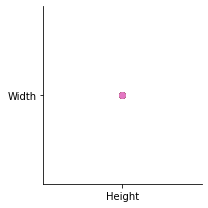

In [14]:
sns.FacetGrid(data=pdata,hue='Species').map(plt.scatter,x='Height',y='Width')

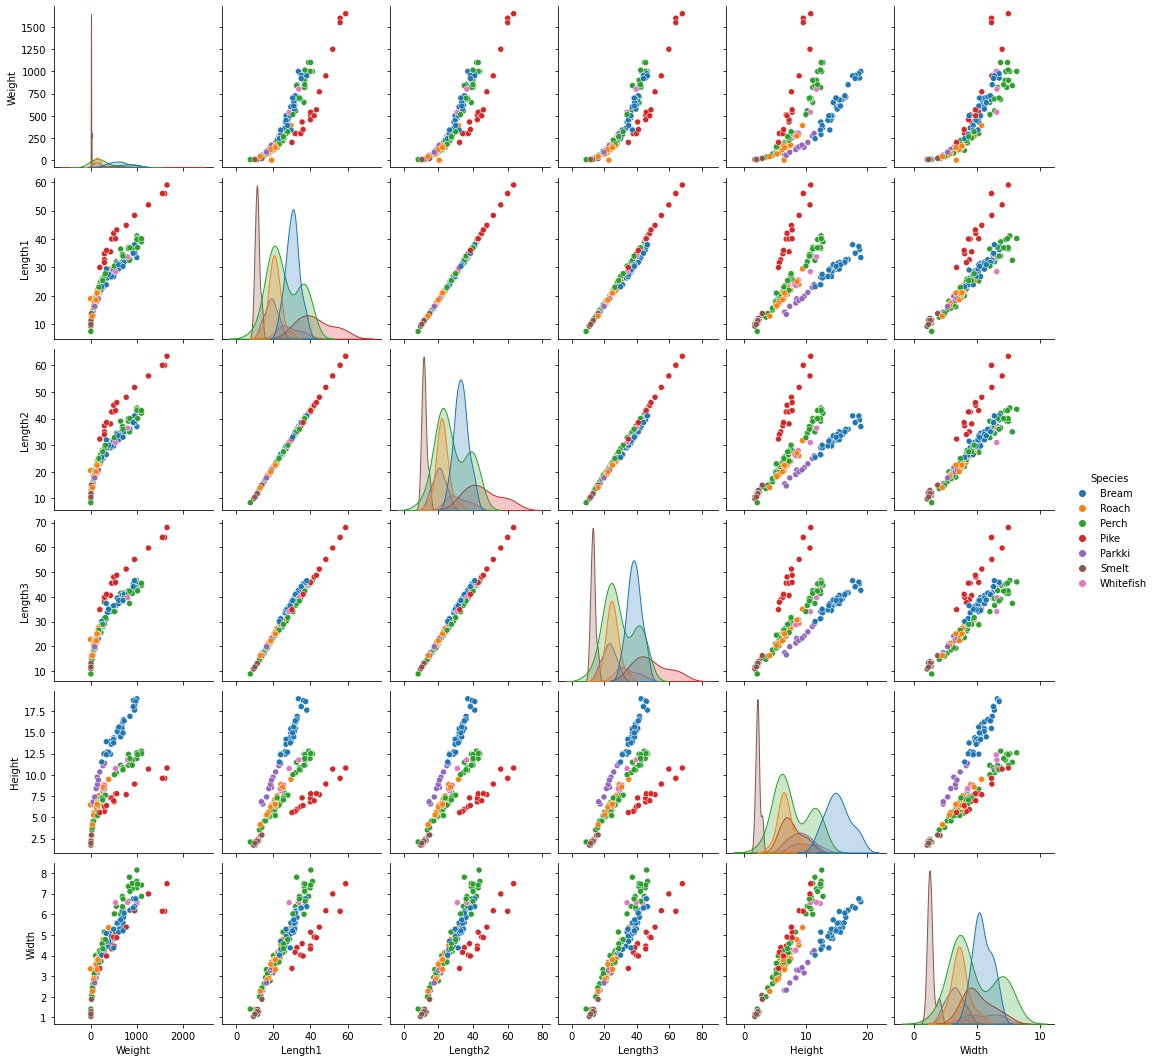

In [15]:
sns.pairplot(data=pdata,hue='Species')

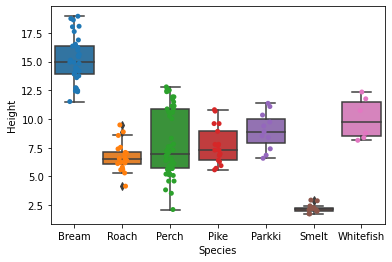

In [16]:
sns.stripplot(x='Species',y='Height',data=pdata)
sns.boxplot(x='Species',y='Height',data=pdata)

In [17]:
from pyspark.ml.feature import VectorAssembler

In [18]:
data.printSchema()

root
 |-- Species: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Length1: double (nullable = true)
 |-- Length2: double (nullable = true)
 |-- Length3: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Width: double (nullable = true)



In [19]:
from pyspark.ml.feature import StringIndexer

In [20]:
si = StringIndexer(inputCol='Species',outputCol='nSpecies')

In [21]:
fdata = si.fit(data).transform(data)

In [22]:
fdata.show()

+-------+------+-------+-------+-------+-------+------+--------+
|Species|Weight|Length1|Length2|Length3| Height| Width|nSpecies|
+-------+------+-------+-------+-------+-------+------+--------+
|  Bream| 430.0|   26.5|   29.0|   34.0| 12.444| 5.134|     1.0|
|  Roach| 390.0|   29.5|   31.7|   35.0|  9.485| 5.355|     2.0|
|  Bream| 700.0|   30.4|   33.0|   38.3|14.8604|5.2854|     1.0|
|  Roach|   0.0|   19.0|   20.5|   22.8| 6.4752|3.3516|     2.0|
|  Perch| 115.0|   19.0|   21.0|   22.5| 5.9175|3.3075|     0.0|
|  Bream| 720.0|   32.0|   35.0|   40.6|16.3618|  6.09|     1.0|
|  Perch|1100.0|   39.0|   42.0|   44.6|12.8002|6.8684|     0.0|
|  Perch|  51.5|   15.0|   16.2|   17.2| 4.5924|2.6316|     0.0|
|   Pike| 430.0|   35.5|   38.0|   40.5|   7.29|4.5765|     3.0|
|  Perch| 556.0|   32.0|   34.5|   36.5|10.2565|6.3875|     0.0|
| Parkki| 140.0|   19.0|   20.7|   23.2| 8.5376|3.2944|     5.0|
| Parkki| 273.0|   23.0|   25.0|   28.0| 11.088| 4.144|     5.0|
|  Roach| 120.0|   19.4| 

In [24]:
fdata = fdata.drop(col('Species'))

In [25]:
fdata.show()

+------+-------+-------+-------+-------+------+--------+
|Weight|Length1|Length2|Length3| Height| Width|nSpecies|
+------+-------+-------+-------+-------+------+--------+
| 430.0|   26.5|   29.0|   34.0| 12.444| 5.134|     1.0|
| 390.0|   29.5|   31.7|   35.0|  9.485| 5.355|     2.0|
| 700.0|   30.4|   33.0|   38.3|14.8604|5.2854|     1.0|
|   0.0|   19.0|   20.5|   22.8| 6.4752|3.3516|     2.0|
| 115.0|   19.0|   21.0|   22.5| 5.9175|3.3075|     0.0|
| 720.0|   32.0|   35.0|   40.6|16.3618|  6.09|     1.0|
|1100.0|   39.0|   42.0|   44.6|12.8002|6.8684|     0.0|
|  51.5|   15.0|   16.2|   17.2| 4.5924|2.6316|     0.0|
| 430.0|   35.5|   38.0|   40.5|   7.29|4.5765|     3.0|
| 556.0|   32.0|   34.5|   36.5|10.2565|6.3875|     0.0|
| 140.0|   19.0|   20.7|   23.2| 8.5376|3.2944|     5.0|
| 273.0|   23.0|   25.0|   28.0| 11.088| 4.144|     5.0|
| 120.0|   19.4|   21.0|   23.7| 6.1146|3.2943|     2.0|
| 300.0|   25.2|   27.3|   28.7|  8.323|5.1373|     0.0|
| 850.0|   32.8|   36.0|   41.6

In [26]:
fdata.columns

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'nSpecies']

In [27]:
vector = VectorAssembler(inputCols=['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],outputCol='features')

In [29]:
kdata = vector.transform(fdata)

In [30]:
kdata.show()

+------+-------+-------+-------+-------+------+--------+--------------------+
|Weight|Length1|Length2|Length3| Height| Width|nSpecies|            features|
+------+-------+-------+-------+-------+------+--------+--------------------+
| 430.0|   26.5|   29.0|   34.0| 12.444| 5.134|     1.0|[430.0,26.5,29.0,...|
| 390.0|   29.5|   31.7|   35.0|  9.485| 5.355|     2.0|[390.0,29.5,31.7,...|
| 700.0|   30.4|   33.0|   38.3|14.8604|5.2854|     1.0|[700.0,30.4,33.0,...|
|   0.0|   19.0|   20.5|   22.8| 6.4752|3.3516|     2.0|[0.0,19.0,20.5,22...|
| 115.0|   19.0|   21.0|   22.5| 5.9175|3.3075|     0.0|[115.0,19.0,21.0,...|
| 720.0|   32.0|   35.0|   40.6|16.3618|  6.09|     1.0|[720.0,32.0,35.0,...|
|1100.0|   39.0|   42.0|   44.6|12.8002|6.8684|     0.0|[1100.0,39.0,42.0...|
|  51.5|   15.0|   16.2|   17.2| 4.5924|2.6316|     0.0|[51.5,15.0,16.2,1...|
| 430.0|   35.5|   38.0|   40.5|   7.29|4.5765|     3.0|[430.0,35.5,38.0,...|
| 556.0|   32.0|   34.5|   36.5|10.2565|6.3875|     0.0|[556.0,3

In [31]:
output_data = kdata.select('nSpecies','features')

In [32]:
output_data.show()

+--------+--------------------+
|nSpecies|            features|
+--------+--------------------+
|     1.0|[430.0,26.5,29.0,...|
|     2.0|[390.0,29.5,31.7,...|
|     1.0|[700.0,30.4,33.0,...|
|     2.0|[0.0,19.0,20.5,22...|
|     0.0|[115.0,19.0,21.0,...|
|     1.0|[720.0,32.0,35.0,...|
|     0.0|[1100.0,39.0,42.0...|
|     0.0|[51.5,15.0,16.2,1...|
|     3.0|[430.0,35.5,38.0,...|
|     0.0|[556.0,32.0,34.5,...|
|     5.0|[140.0,19.0,20.7,...|
|     5.0|[273.0,23.0,25.0,...|
|     2.0|[120.0,19.4,21.0,...|
|     0.0|[300.0,25.2,27.3,...|
|     1.0|[850.0,32.8,36.0,...|
|     0.0|[85.0,18.2,20.0,2...|
|     4.0|[13.4,11.7,12.4,1...|
|     2.0|[161.0,22.0,23.4,...|
|     0.0|[650.0,36.5,39.0,...|
|     1.0|[1000.0,33.5,37.0...|
+--------+--------------------+
only showing top 20 rows



In [33]:
train,test = output_data.randomSplit([0.7,0.3])

In [34]:
from pyspark.ml.regression import LinearRegression


In [35]:
lr = LinearRegression(featuresCol='features',labelCol='nSpecies'  )

In [36]:
training = lr.fit(train)

In [43]:
testing = training.transform(test)

In [44]:
testing.show()

+--------+--------------------+------------------+
|nSpecies|            features|        prediction|
+--------+--------------------+------------------+
|     1.0|[430.0,26.5,29.0,...| 1.858649093127459|
|     0.0|[115.0,19.0,21.0,...|0.9821352250581232|
|     0.0|[51.5,15.0,16.2,1...|2.1171814760135748|
|     3.0|[430.0,35.5,38.0,...| 2.178048175408357|
|     2.0|[120.0,19.4,21.0,...|2.4191770600086366|
|     4.0|[13.4,11.7,12.4,1...|3.6713762409098956|
|     2.0|[161.0,22.0,23.4,...| 3.232124121382363|
|     1.0|[1000.0,33.5,37.0...|0.8542192522557306|
|     1.0|[475.0,28.4,31.0,...|2.0878397039204404|
|     4.0|[19.7,13.2,14.3,1...|2.4205145314768117|
|     6.0|[1000.0,37.3,40.0...|1.8489549934826108|
|     3.0|[300.0,32.7,35.0,...| 2.849831179105072|
|     1.0|[685.0,31.4,34.0,...| 2.550694281031358|
|     0.0|[685.0,34.0,36.5,...|0.5773740597452504|
|     1.0|[500.0,28.5,30.7,...| 3.142417535903246|
|     2.0|[160.0,20.5,22.5,...|1.5235913999332937|
|     0.0|[120.0,20.0,22.0,...|

In [45]:
from pyspark.ml.evaluation import *

In [48]:
rscore = training.evaluate(test)

In [53]:
print(rscore.r2)

0.289992901032486
